In [1]:
# 데이터 읽어오기
import pandas as pd

df = pd.read_csv('data/dataset.csv')
df.shape

(3712, 6)

In [2]:
df.head()

,date,avgTemp,minTemp,maxTemp,rainfall,price
0,2010-01-01,-4.9,-11.0,0.9,0.0,2123.0
1,2010-01-02,-0.1,-5.5,5.5,0.8,2123.0
2,2010-01-03,-2.9,-6.9,1.4,0.0,2123.0
3,2010-01-04,-1.8,-5.1,2.2,5.9,2123.0
4,2010-01-05,-5.2,-8.7,-1.8,0.7,2209.0


In [3]:
# 데이터 세트 분리하기(train, test)
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1]
X.shape

(3712, 4)

In [4]:
X.head()

,avgTemp,minTemp,maxTemp,rainfall
0,-4.9,-11.0,0.9,0.0
1,-0.1,-5.5,5.5,0.8
2,-2.9,-6.9,1.4,0.0
3,-1.8,-5.1,2.2,5.9
4,-5.2,-8.7,-1.8,0.7


In [5]:
y = df.iloc[:, [-1]]
y.shape

(3712, 1)

In [6]:
y.head()

,price
0,2123.0
1,2123.0
2,2123.0
3,2123.0
4,2209.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2969, 4), (743, 4), (2969, 1), (743, 1))

In [8]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std[:1], X_test_std[:1]

(array([[1.20068016, 1.36145676, 1.02124893, 0.36088108]]),
 array([[-1.92944894, -1.82081072, -1.97903611, -0.36876906]]))

In [9]:
# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# 예측
y_predicted = mlr.predict(X_test_std)
y_predicted[:1]

array([[2968.71044571]])

In [11]:
# 정확도 측정

#  R2 결정계수(coefficient of determination)
mlr.score(X_train_std, y_train)

0.021070074217341528

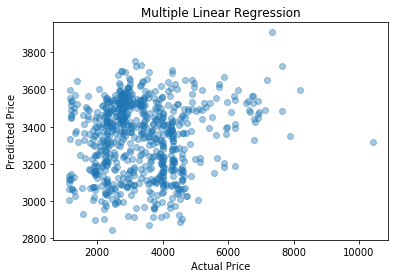

In [12]:
# 실제 가격과 예측된 가격 비교 시각화
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression')
plt.show()

In [13]:
# 모델 저장
import pickle

with open('model/predict_cabbage_price.model', 'wb') as f:
    pickle.dump(sc, f)
    pickle.dump(mlr, f)